<a href="https://colab.research.google.com/github/Andikadreams/PCVK_Semester5_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast,Inverse, Logarithmic Brightness, dan Grayscale Image**

PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mengubah tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan : 50


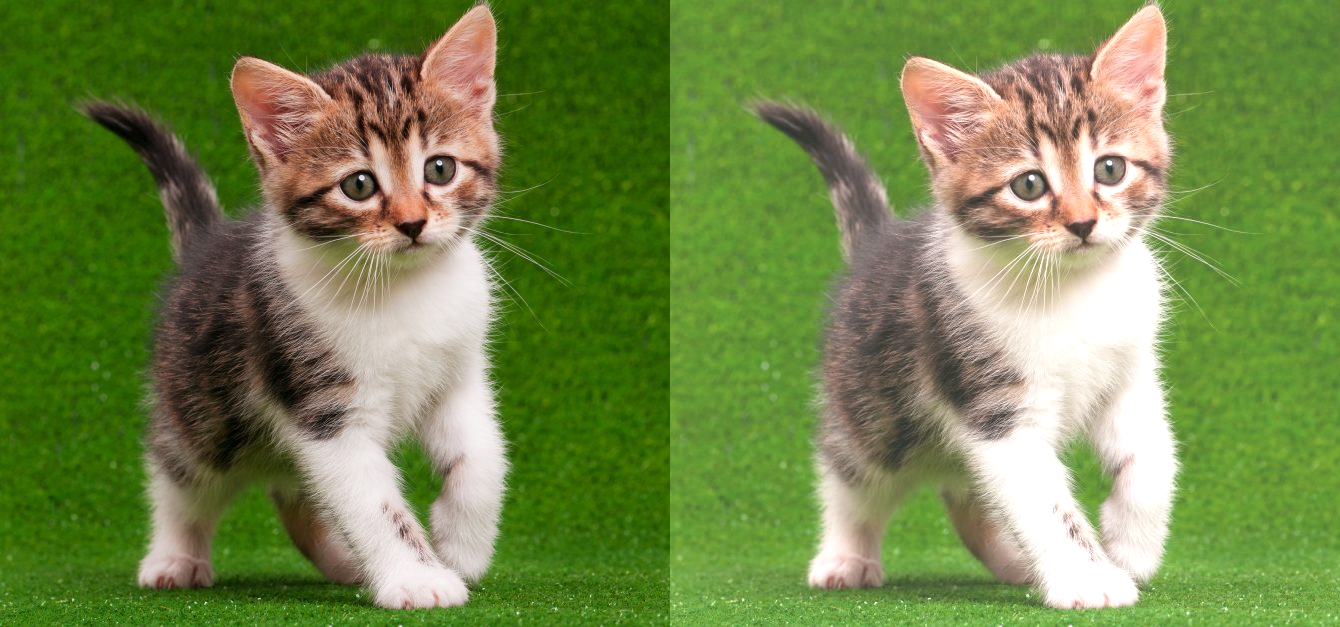

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
print ('mengubah tingkat kecerahan citra')
print ('--------------------------------')
try:
  brightness = int(input('masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



  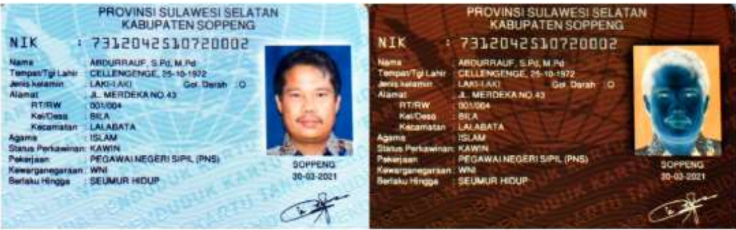

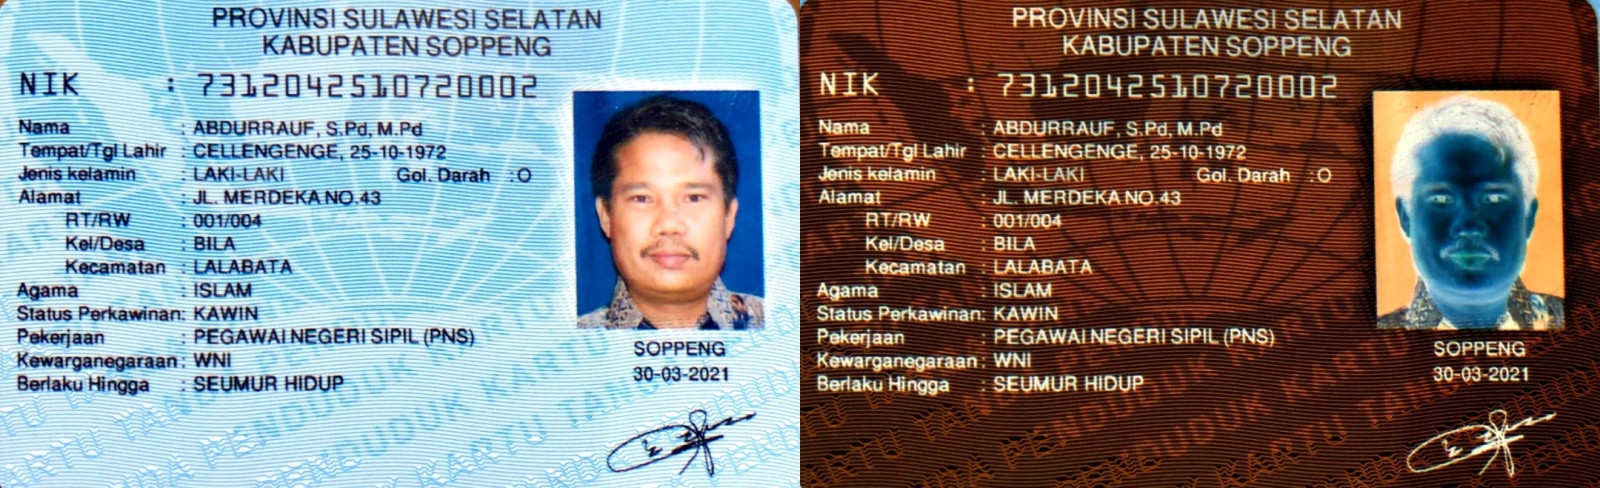

In [7]:
original_tgs1 = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
inverse_citra = np.zeros(original_tgs1.shape, original_tgs1.dtype)

#inverse citra g(x) = 255 - f(x) dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli
inverse_citra = 255 - original_tgs1

final_frame = cv.hconcat((original_tgs1, inverse_citra))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

transformasi contrast
--------------------------------
masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2.0


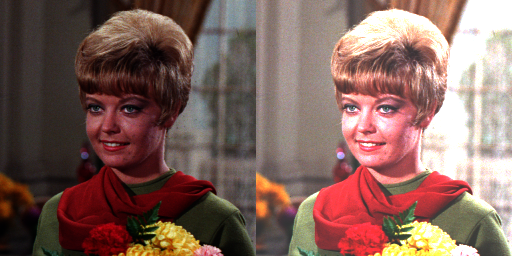

In [10]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
print ('transformasi contrast')
print ('--------------------------------')
#input kecerahan dan kontras
try:
  brightness = int(input('masukkan tingkat kecerahan [-255 - 255]: '))
  contras = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('error, not a number')
#Transformasi kontras
adjusted_image = cv.convertScaleAbs(original, alpha=contras, beta=brightness)
#Menampilkan hasil
final_frame = cv.hconcat((original, adjusted_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

transformasi logarithmic brightness
--------------------------------
masukkan nilai kecerahan: 50


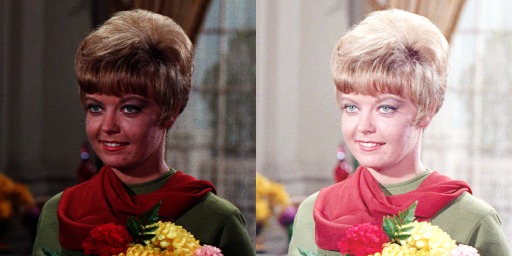

In [13]:
original_female = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
print ('transformasi logarithmic brightness')
print ('--------------------------------')
#input kecerahan dan kontras
try:
  brightness = int(input('masukkan nilai kecerahan: '))
except ValueError:
  print('error, not a number')

brightness_image = np.zeros(original_female.shape, original_female.dtype)
#transformasi logarithmic brightness
for y in range(original_female.shape[0]):
  for x in range(original_female.shape[1]):
    for c in range(original_female.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original_female[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original_female, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



*   Averaging



a. Averaging


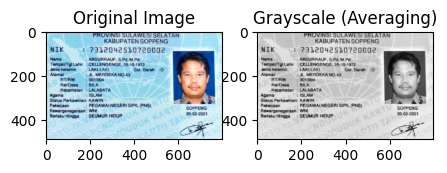

In [49]:
original_ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Grayscale dengan metode Averaging
average_image = np.zeros(original_ktp.shape[:2], dtype=np.uint8)

for y in range(original_ktp.shape[0]):
    for x in range(original_ktp.shape[1]):
        red = int(original_ktp[y, x, 2])
        green = int(original_ktp[y, x, 1])
        blue = int(original_ktp[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar original dan hasil transformasi grayscale
# Ukuran gambar yang ditampilkan
plt.figure(figsize=(5, 5))
print('a. Averaging')
# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original_ktp, cv.COLOR_BGR2RGB))
plt.title('Original Image')
# Plot Averaging Transformation
plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')

plt.show()

*   Lightness


b. Lightness


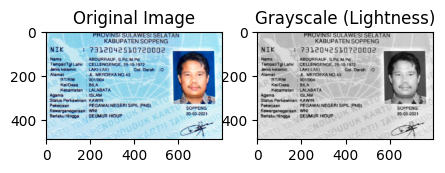

In [51]:
original_ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Grayscale dengan metode Lightness
lightness_image = np.zeros(original_ktp.shape[:2], dtype=np.uint8)

for y in range(original_ktp.shape[0]):
    for x in range(original_ktp.shape[1]):
        red = int(original_ktp[y, x, 2])
        green = int(original_ktp[y, x, 1])
        blue = int(original_ktp[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

# Tampilkan gambar original dan hasil transformasi grayscale
# Ukuran gambar yang ditampilkan
plt.figure(figsize=(5, 5))
print('b. Lightness')
# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original_ktp, cv.COLOR_BGR2RGB))
plt.title('Original Image')
# Plot Lightness Transformation
plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()

*   Luminance



c. Luminance


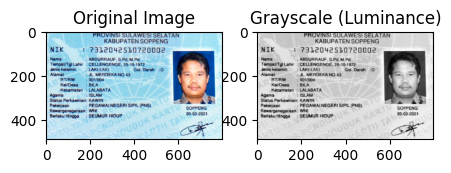

In [124]:

original_ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Grayscale dengan metode Luminance
luminance_image = np.zeros(original_ktp.shape[:2], dtype=np.uint8)

for y in range(original_ktp.shape[0]):
    for x in range(original_ktp.shape[1]):
        red = int(original_ktp[y, x, 2])
        green = int(original_ktp[y, x, 1])
        blue = int(original_ktp[y, x, 0])
        luminance = 0.21 * red + 0.72 * green + 0.07 * blue
        luminance_image[y, x] = np.uint8(luminance)

plt.figure(figsize=(5, 5))

# Plot Luminance Transformation
print('c. Luminance')
# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original_ktp, cv.COLOR_BGR2RGB))
plt.title('Original Image')
# Plot Lightness Transformation
plt.subplot(1, 2, 2)
plt.imshow(luminance_image, cmap='gray')
plt.title('Grayscale (Luminance)')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

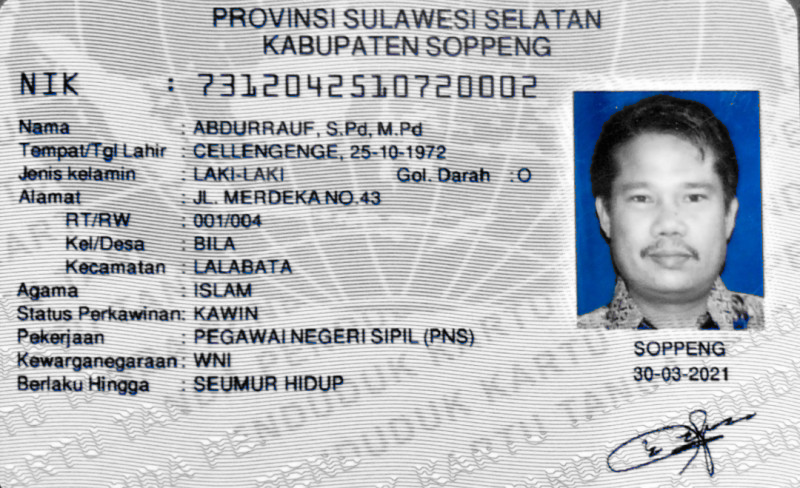

In [126]:
# Baca citra masukan
image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Tentukan batas warna biru dalam format BGR (Blue, Green, Red)
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Dapatkan dimensi citra
height, width, channels = image.shape

# Buat citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Inisialisasi citra hasil
final_result = np.zeros_like(image)

# Perulangan untuk mengiterasi melalui semua piksel citra
for y in range(height):
    for x in range(width):
        # Dapatkan nilai warna BGR piksel saat ini
        pixel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra hasil
cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()